In [23]:
import basic_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

df = pd.read_csv('telco_processed.csv')
print("Dataset shape:", df.shape)

Dataset shape: (7021, 30)


In [24]:
print("Data types:")
print(df.dtypes)

Data types:
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
TotalServices                                int64
HasInternet                                  int64
TenureGroup        

In [25]:
print("\nNon-numeric columns:")
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Non-numeric columns:
Index(['TenureGroup'], dtype='object')


In [26]:
if len(non_numeric_cols) > 0:
    print("\nUnique values in non-numeric columns:")
    for col in non_numeric_cols:
        print(f"{col}: {df[col].unique()}")


Unique values in non-numeric columns:
TenureGroup: ['0-1yr' '2-4yr' '1-2yr' '4-6yr' nan]


In [27]:
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

In [28]:
print("\nAfter processing - Data types:")
print(df.dtypes)
print("New shape:", df.shape)


After processing - Data types:
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
TotalServices                                int64
HasInternet                                  int64

In [29]:
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Features shape:", X.shape)
print("Target distribution:")
print(y.value_counts())

Features shape: (7021, 31)
Target distribution:
Churn
0    5164
1    1857
Name: count, dtype: int64


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (5616, 31)
Testing set: (1405, 31)


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed")
print("Training data - Mean:", X_train_scaled.mean(), "Std:", X_train_scaled.std())
print("Test data - Mean:", X_test_scaled.mean(), "Std:", X_test_scaled.std())

Data scaling completed
Training data - Mean: -1.7345640491340557e-18 Std: 1.0
Test data - Mean: -0.0023373149177561966 Std: 1.0022027776621183


In [32]:
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),  # Smaller first layer
    layers.Dense(16, activation='relu'),  # Smaller second layer
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Basic Neural Network architecture:")
model.summary()

Basic Neural Network architecture:


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 32)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,569 (6.13 KB)

 Trainable params: 1,569 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
print("\nTraining Basic Neural Network...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)



Training Basic Neural Network...
Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7260 - loss: 0.5352 - val_accuracy: 0.7838 - val_loss: 0.4464
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4281 - val_accuracy: 0.7989 - val_loss: 0.4268
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.4145 - val_accuracy: 0.8123 - val_loss: 0.4244
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.4079 - val_accuracy: 0.8078 - val_loss: 0.4249
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.4026 - val_accuracy: 0.8052 - val_loss: 0.4295
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8157 - loss: 0.3993 - val_accuracy: 0.8016 - val_loss: 0.4245
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8188 - loss: 0.3967 - val_accuracy: 0.8025 - val_loss: 0.4306
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8134

In [34]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print("\n=== BASIC NEURAL NETWORK PERFORMANCE ===")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


=== BASIC NEURAL NETWORK PERFORMANCE ===
Training Accuracy: 0.8504
Testing Accuracy: 0.7744


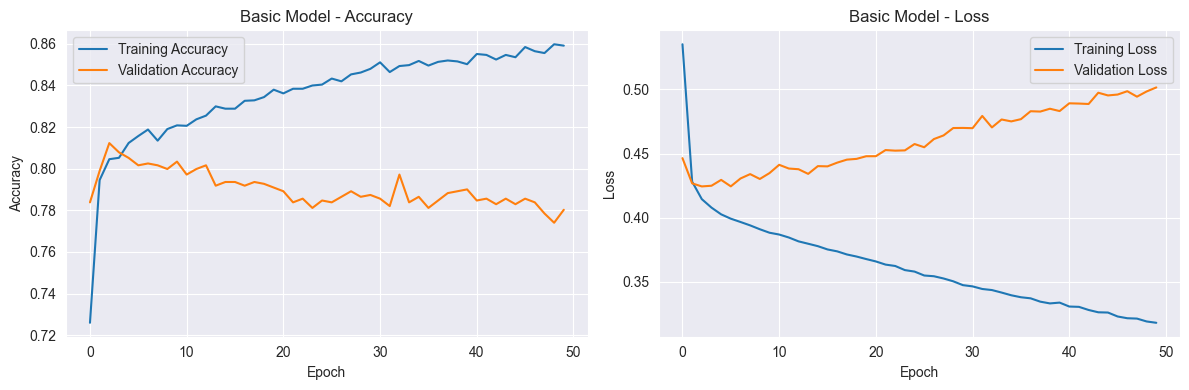

In [35]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Basic Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
nn_basic_results = {
    'model': 'NeuralNetwork_Basic',
    'train_accuracy': train_accuracy,
    'test_accuracy': test_accuracy,
    'architecture': '32-16-1 (Simple)'
}

print("\nBasic Neural Network training completed!")
print(f"Final Test Accuracy: {test_accuracy:.4f}")



Basic Neural Network training completed!
Final Test Accuracy: 0.7744


In [37]:
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("\nBasic Model - Classification Report:")
print(classification_report(y_test, y_pred))

print("Basic Model - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Basic Model - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.58      0.52      0.55       372

    accuracy                           0.77      1405
   macro avg       0.71      0.69      0.70      1405
weighted avg       0.77      0.77      0.77      1405

Basic Model - Confusion Matrix:
[[893 140]
 [177 195]]


In [38]:
def create_model(learning_rate=0.001, dropout_rate=0.3, neurons=64):
    model = keras.Sequential([
        layers.Input(shape=(X_train_scaled.shape[1],)),  # Add Input layer
        layers.Dense(neurons, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(neurons//2, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [39]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=0.0001
)

print("Callbacks configured")

Callbacks configured


In [40]:
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64]
neurons_list = [32, 64, 128]

best_accuracy = 0
best_params = {}

print("Starting manual hyperparameter tuning...")

for lr in learning_rates:
    for batch_size in batch_sizes:
        for neurons in neurons_list:
            model = create_model(learning_rate=lr, neurons=neurons)

            history = model.fit(
                X_train_scaled, y_train,
                epochs=50,
                batch_size=batch_size,
                validation_split=0.2,
                callbacks=[early_stopping],
                verbose=0
            )

            test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_params = {
                    'learning_rate': lr,
                    'batch_size': batch_size,
                    'neurons': neurons
                }
                best_model = model

            print(f"LR: {lr}, Batch: {batch_size}, Neurons: {neurons} -> Accuracy: {test_accuracy:.4f}")

print(f"\nBest accuracy: {best_accuracy:.4f}")
print("Best parameters:", best_params)

Starting manual hyperparameter tuning...
LR: 0.01, Batch: 16, Neurons: 32 -> Accuracy: 0.7964
LR: 0.01, Batch: 16, Neurons: 64 -> Accuracy: 0.7964
LR: 0.01, Batch: 16, Neurons: 128 -> Accuracy: 0.7552
LR: 0.01, Batch: 32, Neurons: 32 -> Accuracy: 0.7993
LR: 0.01, Batch: 32, Neurons: 64 -> Accuracy: 0.7950
LR: 0.01, Batch: 32, Neurons: 128 -> Accuracy: 0.7943
LR: 0.01, Batch: 64, Neurons: 32 -> Accuracy: 0.7915
LR: 0.01, Batch: 64, Neurons: 64 -> Accuracy: 0.8043



KeyboardInterrupt



In [19]:
final_model = create_model(
    learning_rate=best_params['learning_rate'],
    neurons=best_params['neurons']
)

history_final = final_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=best_params['batch_size'],
    validation_split=0.2,
    callbacks=[early_stopping],  # Only early stopping
    verbose=1
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7825 - loss: 0.4613 - val_accuracy: 0.8025 - val_loss: 0.4401
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.4292 - val_accuracy: 0.8060 - val_loss: 0.4332
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.4214 - val_accuracy: 0.7980 - val_loss: 0.4643
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8039 - loss: 0.4241 - val_accuracy: 0.7989 - val_loss: 0.4411
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4213 - val_accuracy: 0.7918 - val_loss: 0.4353
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8117 - loss: 0.4126 - val_accuracy: 0.7883 - val_loss: 0.4690
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8030 - loss: 0.4142 - val_accuracy: 0.7874 - val_loss: 0.4456
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8085 - loss: 0.4103 - val_accuracy: 0.7963 - v

In [20]:
train_loss_final, train_accuracy_final = final_model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss_final, test_accuracy_final = final_model.evaluate(X_test_scaled, y_test, verbose=0)

print("=== OPTIMIZED NEURAL NETWORK PERFORMANCE ===")
print(f"Training Accuracy: {train_accuracy_final:.4f}")
print(f"Testing Accuracy: {test_accuracy_final:.4f}")

=== OPTIMIZED NEURAL NETWORK PERFORMANCE ===
Training Accuracy: 0.8059
Testing Accuracy: 0.8000


In [21]:
comparison_nn = pd.DataFrame({
    'Model': ['Basic NN', 'Optimized NN'],
    'Train Accuracy': [nn_basic_results['train_accuracy'], train_accuracy_final],
    'Test Accuracy': [nn_basic_results['test_accuracy'], test_accuracy_final]
})

print("=== NEURAL NETWORK COMPARISON ===")
print(comparison_nn)


=== NEURAL NETWORK COMPARISON ===
          Model  Train Accuracy  Test Accuracy
0      Basic NN        0.844195       0.775801
1  Optimized NN        0.805912       0.800000


In [22]:
final_model.save('neural_network_model.keras')
print("Optimized Neural Network saved as 'neural_network_model.keras'")

nn_optimized_results = {
    'model': 'NeuralNetwork_Optimized',
    'best_params': best_params,
    'train_accuracy': train_accuracy_final,
    'test_accuracy': test_accuracy_final,
    'improvement': test_accuracy_final - nn_basic_results['test_accuracy']
}

print("Optimized Neural Network results saved")

Optimized Neural Network saved as 'neural_network_model.keras'
Optimized Neural Network results saved


In [41]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

y_pred_proba_nn = final_model.predict(X_test_scaled)
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


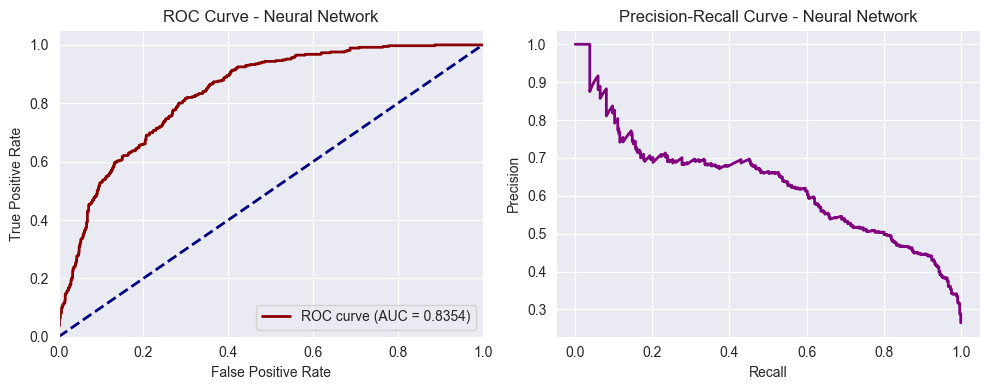

AUC Score: 0.8354


In [42]:
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(fpr_nn, tpr_nn, color='darkred', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_pred_proba_nn)
plt.plot(recall_nn, precision_nn, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.tight_layout()
plt.show()

print(f"AUC Score: {roc_auc_nn:.4f}")

In [43]:
print("=== NEURAL NETWORK CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_nn))

=== NEURAL NETWORK CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.68      0.47      0.55       372

    accuracy                           0.80      1405
   macro avg       0.75      0.69      0.71      1405
weighted avg       0.79      0.80      0.79      1405



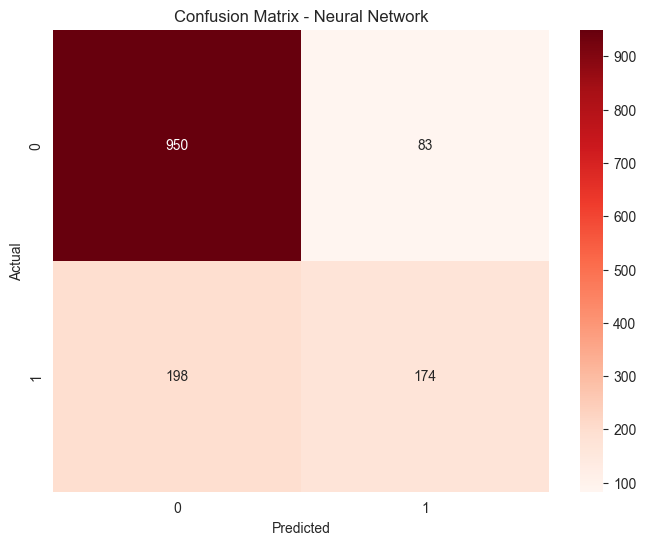

In [44]:
cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

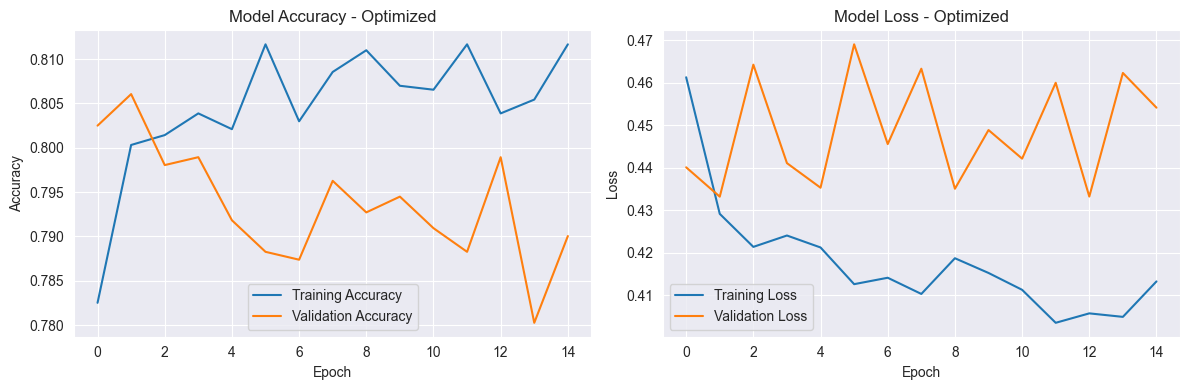

In [45]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_final.history['accuracy'], label='Training Accuracy')
plt.plot(history_final.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - Optimized')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_final.history['loss'], label='Training Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - Optimized')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print("=== FINAL NEURAL NETWORK METRICS ===")
print(f"Accuracy: {test_accuracy_final:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-Score: {f1_nn:.4f}")
print(f"AUC Score: {roc_auc_nn:.4f}")

=== FINAL NEURAL NETWORK METRICS ===
Accuracy: 0.8000
Precision: 0.6770
Recall: 0.4677
F1-Score: 0.5533
AUC Score: 0.8354


In [48]:
nn_final_results = {
    'model': 'NeuralNetwork_Final',
    'test_accuracy': test_accuracy_final,
    'precision': precision_nn,
    'recall': recall_nn,
    'f1_score': f1_nn,
    'auc_score': roc_auc_nn,
    'best_params': best_params
}

print("Final Neural Network evaluation completed")

Final Neural Network evaluation completed
